In [1]:
!pip install yfinance pandas numpy matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


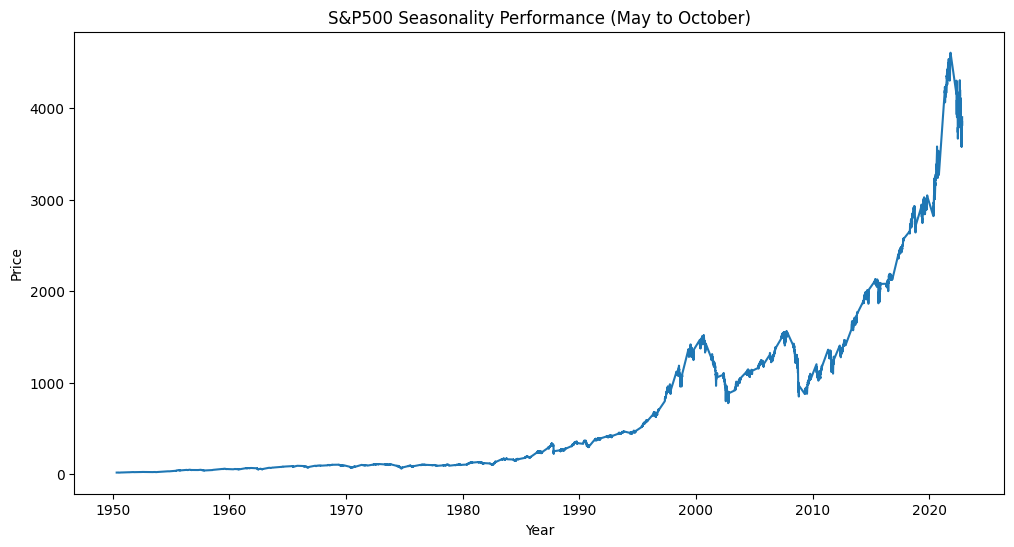

Average return: 0.06999999999999999%
Median return: 0.04%
% of time up: 52.35%
Average correction: -0.45999999999999996%
Median correction: -0.27999999999999997%


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the date range
start_date = '1950-01-01'
end_date = '2022-10-31'

# Download S&P500 data from Yahoo Finance
spy = yf.Ticker("^GSPC")
spy_data = spy.history(start=start_date, end=end_date)

# Get the daily returns for May to October
daily_data = spy_data[(spy_data.index.month >= 5) & (spy_data.index.month <= 10)]
daily_returns = daily_data['Close'].pct_change().dropna()

# Calculate the average return
avg_return = round(daily_returns.mean(), 4)

# Calculate the median return
median_return = round(daily_returns.median(), 4)

# Calculate the % of time up
pct_time_up = round(daily_returns[daily_returns > 0].count() / daily_returns.count() * 100, 2)

# Calculate the average correction
corrections = []
for i in range(1, len(daily_returns)):
    if daily_returns.iloc[i] < daily_returns.iloc[i-1]:
        corrections.append(daily_returns.iloc[i])
avg_correction = round(np.mean(corrections), 4)

# Calculate the median correction
median_correction = round(np.median(corrections), 4)

# Plot the chart
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Close'].index, daily_data['Close'])
plt.title('S&P500 Seasonality Performance (May to October)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Print the results
print(f"Average return: {avg_return*100}%")
print(f"Median return: {median_return*100}%")
print(f"% of time up: {pct_time_up}%")
print(f"Average correction: {avg_correction*100}%")
print(f"Median correction: {median_correction*100}%")

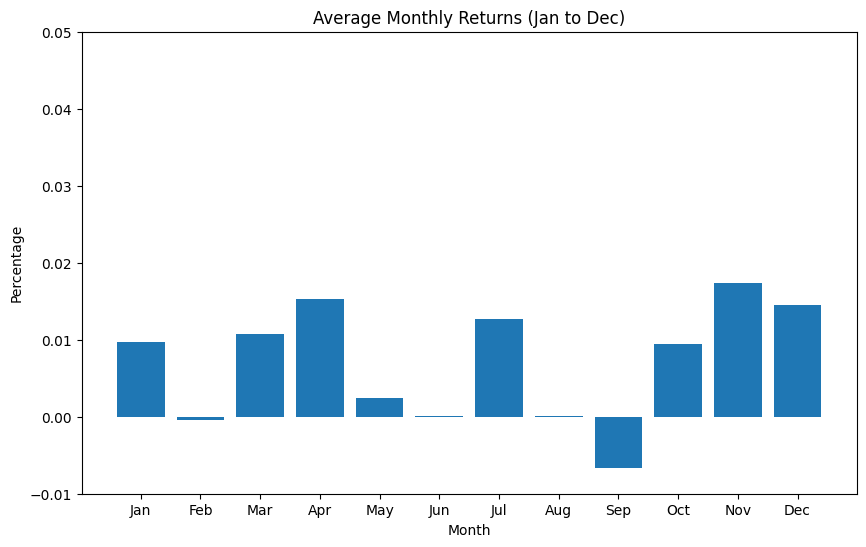

Monthly Performance (Jan to Dec):
Jan: 0.97%
Feb: -0.04%
Mar: 1.07%
Apr: 1.53%
May: 0.24%
Jun: 0.01%
Jul: 1.27%
Aug: 0.01%
Sep: -0.66%
Oct: 0.94%
Nov: 1.74%
Dec: 1.45%


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the date range
start_date = '1950-01-01'
end_date = '2022-12-31'

# Download S&P500 data from Yahoo Finance
spy = yf.Ticker("^GSPC")
spy_data = spy.history(start=start_date, end=end_date)

# Calculate the monthly returns for each month from January to December
monthly_returns = spy_data.resample('M').last().pct_change()
monthly_returns['Month'] = monthly_returns.index.month
jan_to_dec_avg_returns = []
for i in range(1, 13):
    jan_to_dec_avg_returns.append(round(monthly_returns[monthly_returns['Month']==i]['Close'].mean(), 4))

# Plot the bar chart
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
plt.bar(months, jan_to_dec_avg_returns)
plt.title('Average Monthly Returns (Jan to Dec)')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.ylim(-0.01, 0.05)
plt.show()

# Print the results
print("Monthly Performance (Jan to Dec):")
for i in range(12):
    print(f"{months[i]}: {round(jan_to_dec_avg_returns[i]*100,2)}%")